# Getting to Know the Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# A little note - from the very beginning, 
# I suppose that this data contains no duplicate values in terms of duplicated events, for example!
# Let's load it & take a first look!
data = pd.read_csv("data_set_da_test.csv")
data.head(5)

,event_date,session,user,page_type,event_type,product
0,2022-10-08 17:02:41,14274187577460658115s,2006979063809820329u,search_listing_page,page_view,0
1,2022-10-08 17:06:19,14274187577460658115s,2006979063809820329u,search_listing_page,page_view,0
2,2022-10-08 22:19:47,2704204808571844605s,2007646148110679693u,listing_page,page_view,0
3,2022-10-08 22:24:30,8970170322512311099s,11839491588321754710u,search_listing_page,page_view,0
4,2022-10-08 21:22:20,16223970371660715740s,11839887495958431209u,product_page,page_view,0


In [3]:
data.describe(include = "all")

,event_date,session,user,page_type,event_type,product
count,637238,637238,637238,637238,637238,6.372380e+05
unique,464539,340443,288088,4,3,NaN
top,2022-10-05 11:57:23,9543669642136985868s,11769744300065907078u,product_page,page_view,NaN
freq,8,1264,1266,282950,612498,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.146354e+05
std,NaN,NaN,NaN,NaN,NaN,4.536790e+06
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637238 entries, 0 to 637237
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_date  637238 non-null  object
 1   session     637238 non-null  object
 2   user        637238 non-null  object
 3   page_type   637238 non-null  object
 4   event_type  637238 non-null  object
 5   product     637238 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 29.2+ MB


In [7]:
# Since further on I have to work with page_type & event_type columns, it would be great to find out more about these.
'''page_type_and_event_type = data.groupby(["page_type", "event_type"])\
.event_date.count().reset_index().pivot(columns = "page_type", index = "event_type", values = "event_date").\
fillna(0).reset_index()
page_type_and_event_type = page_type_and_event_type.rename(columns = {"event_date": "count"}).fillna(0).reset_index()'''
pd.crosstab(data.event_type, data.page_type).reset_index()

page_type,event_type,listing_page,order_page,product_page,search_listing_page
0,add_to_cart,526,0,12200,3273
1,order,0,8741,0,0
2,page_view,231263,0,270750,110485


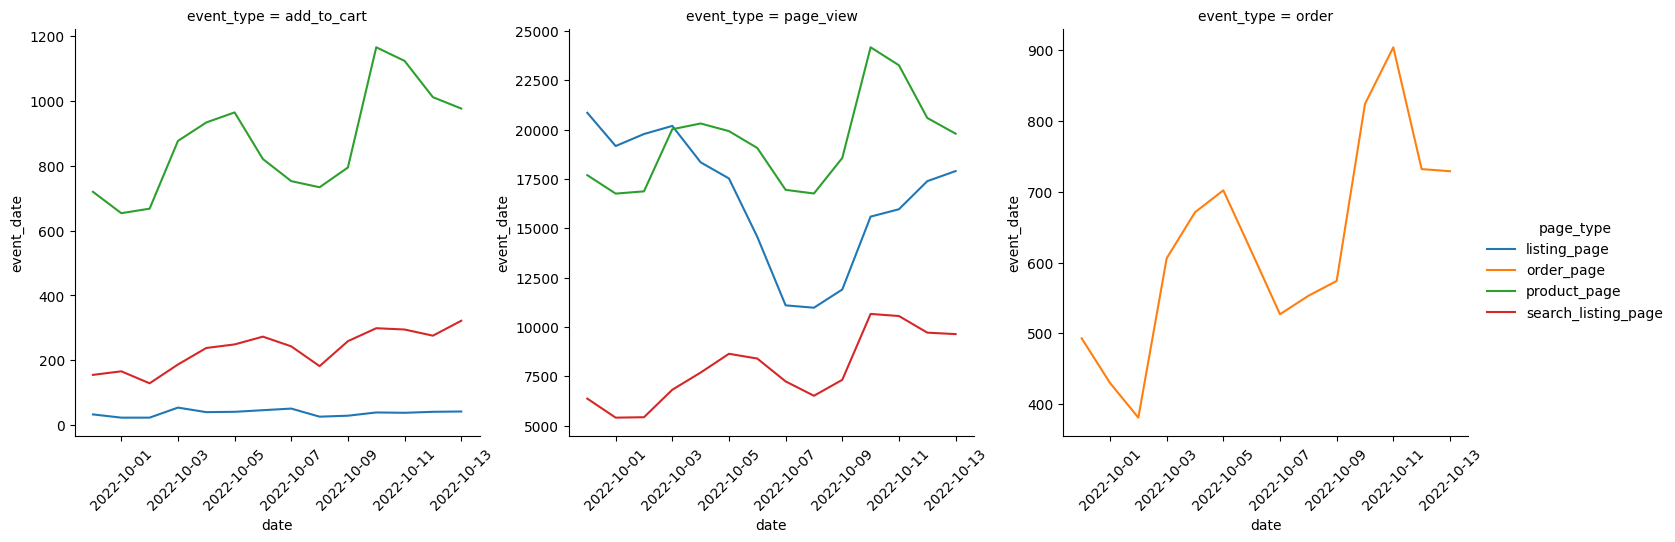

In [8]:
# Let's see how the number of events per each page_type & event_type fluctuate per day!

format = "%Y-%m-%d %H:%M:%S"
data["ts"] = pd.to_datetime(data.event_date, format = format)
data["date"] = data.ts.apply(lambda x: x.date())
data.ts.head(5)
data.date.head(5)
events_by_day = data.groupby(["date", "page_type", "event_type"]).event_date.count().reset_index()
viz = sns.relplot(events_by_day, 
            x = "date", 
            y = "event_date", 
            hue = "page_type",
            col = "event_type", 
            kind = "line",
            facet_kws = {"sharey": False, "sharex": True})
viz.set_xticklabels(rotation = 45)
plt.show()

# Creating & Filling In the Table in Postgres for the 2nd Part of the Task

In [ ]:
# Here I create a table in local Postgres DB filled with the data included in the main CSV file.

#!pip3 install psycopg2-binary
#!pip3 install psycopg2
import psycopg2
connection = psycopg2.connect(database = "postgres", user = "postgres", host = "127.0.0.1", port = "5432")
connection.autocommit = True
cursor = connection.cursor()
sql = '''CREATE TABLE events\
(event_date TIMESTAMP,\
session_id TEXT,\
user_id TEXT,\
page_type TEXT,\
event_type TEXT,\
product INT);'''
cursor.execute(sql)
with open("data_set_da_test.csv", "r") as i:
    next(i)
    cursor.copy_from(i, "events", sep = ",")
connection.commit()

And from here I'm moving to work with the data in SQL (Postgres)!